<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/ch12_ABTesting_21801073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

Data

• MarketID: unique identifier for market

• MaretSize: size of market area by sales

• LocationD: unique identifier for store location

• AgeOfStore: age of store in years

• Promotion: one of three promotions that was tested

• week: one of four weeks when the promotions were run

• SalesInThousands: sales amount for specific LocationID, Promotion, and week

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv & excels/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

In [ ]:
df.shape

(548, 7)

In [ ]:
df.tail(15)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
533,10,Large,917,14,3,2,56.34
534,10,Large,917,14,3,3,51.83
535,10,Large,917,14,3,4,50.20
536,10,Large,918,6,1,1,49.62
537,10,Large,918,6,1,2,62.54
538,10,Large,918,6,1,3,50.11
539,10,Large,918,6,1,4,61.63
540,10,Large,919,2,1,1,59.87
541,10,Large,919,2,1,2,62.99
542,10,Large,919,2,1,3,57.20


In [ ]:
df['MarketID'].describe()

count    548.000000
mean       5.715328
std        2.877001
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: MarketID, dtype: float64

marketID는 1부터 10까지 있다

In [ ]:
df['LocationID'].describe()

count    548.000000
mean     479.656934
std      287.973679
min        1.000000
25%      216.000000
50%      504.000000
75%      708.000000
max      920.000000
Name: LocationID, dtype: float64

LocationID는 1부터 920까지

# 2. Data Analysis

#### - Total Sales

In [ ]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

SalesInThousands는 17,000달러부터 99,000달러 내로 분포되어 있다

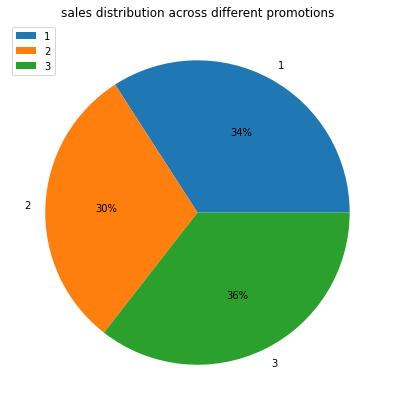

In [ ]:
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(
    figsize=(7,7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')
plt.legend()

plt.show()

result : promotion 3 > promotion 1 > promotion 2

#### - Market Size

In [ ]:
df.groupby('MarketSize').count()['MarketID'] # 시장 규모별 MarketID 개수

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

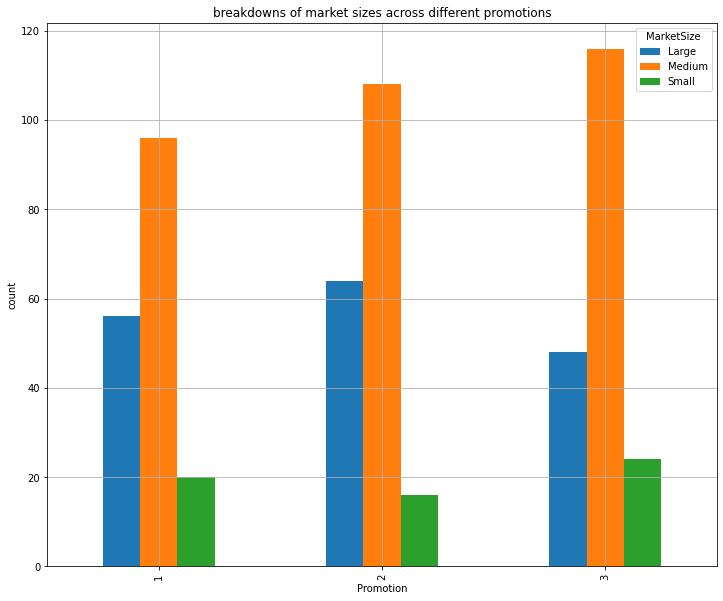

In [ ]:
"""
stack은 컬럼을 인덱스로 보내고, unstack은 인덱스를 컬럼으로 보냄
해당 코드에서는 marketsize를 unstack함으로써 시장규모를 컬럼으로 보냄 ('Promotion'보다 하위그룹인 'MarketSize'를 'bar'형태로 plot 하기 위해)
"""
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

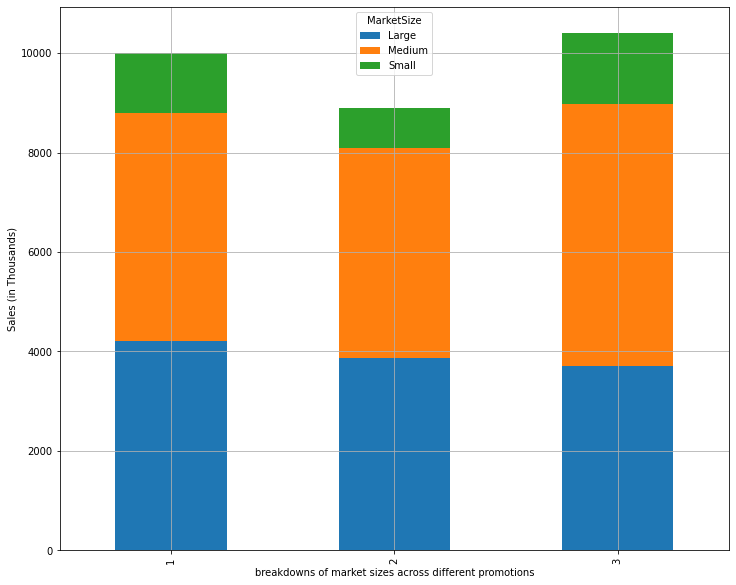

In [ ]:
ax = df.groupby(['Promotion', 'MarketSize']).sum()['SalesInThousands'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_xlabel('breakdowns of market sizes across different promotions')

plt.show()

#### - Store Age

In [ ]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

store의 나이는 1에서 28까지 분포되어 있다

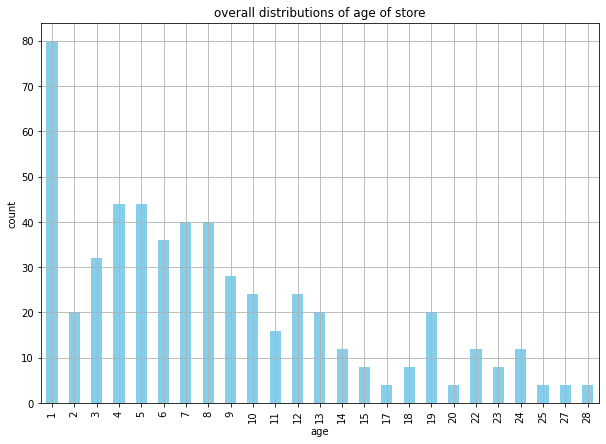

In [ ]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar',
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

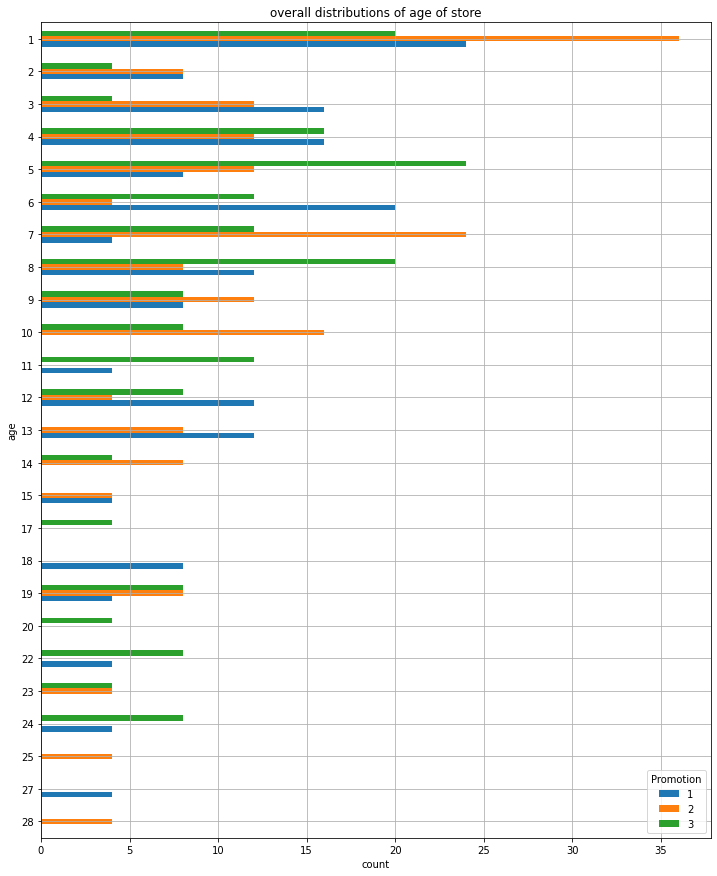

In [ ]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh',
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [ ]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


#### - Week Number

In [ ]:
df.groupby('week').count()['MarketID']

week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [ ]:
df.groupby(['Promotion', 'week']).count()['MarketID']

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

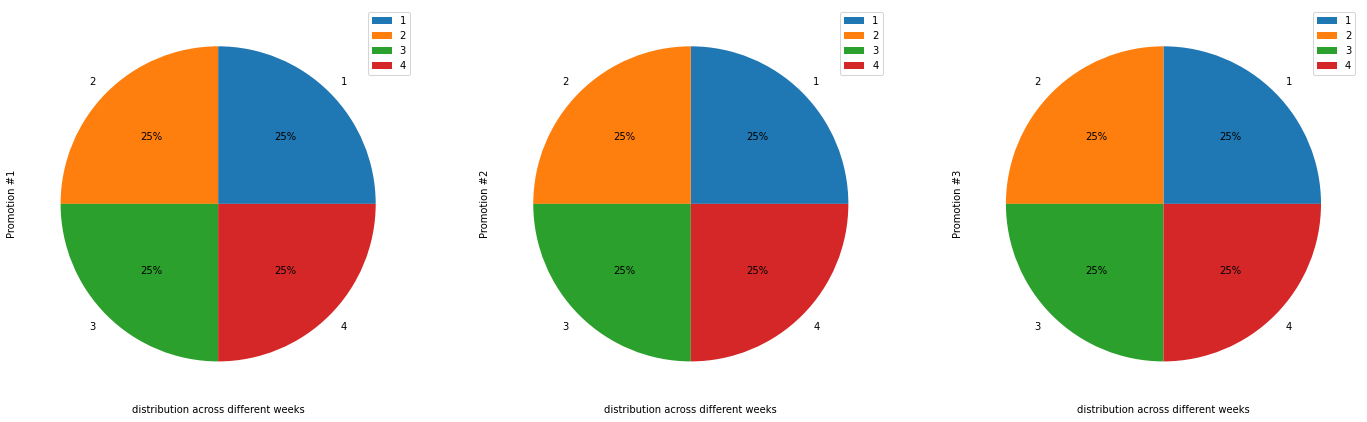

In [ ]:
ax1, ax2, ax3 = df.groupby(['week', 'Promotion']).count()['MarketID'].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24,8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

# 3. Statistical Significance

In [ ]:
import numpy as np
from scipy import stats

#### - t-test

In [ ]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [ ]:
stds = df.groupby('Promotion').count()['SalesInThousands']
stds

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

In [ ]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### - Promotion 1 vs. 2

In [ ]:
t_1_vs_2 = (
    means.iloc[0] - means.iloc[1]
) / np.sqrt(
    (stds.iloc[0]**2 / ns.iloc[0]) + (stds.iloc[1]**2 / ns.iloc[1])
)

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [ ]:
t_1_vs_2

0.5676075860311247

In [ ]:
p_1_vs_2

0.5706572291421748

#### - using scipy

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var=False
)

In [ ]:
t

6.42752867090748

In [ ]:
p

4.2903687179871785e-10

#### - Promotion 1 vs 3

In [ ]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2]
) / np.sqrt(
    (stds.iloc[0]**2 / ns.iloc[0]) + (stds.iloc[2]**2 / ns.iloc[2])
)

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df = df_1_vs_3))*2

In [ ]:
t_1_vs_3

0.1441230992692669

In [ ]:
p_1_vs_3

0.8854843596069779

#### - using scipy

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
    equal_var=False
)

In [ ]:
t

1.5560224307758634

In [ ]:
p

0.12059147742229478